In [77]:
!pip3 install --user numpy pandas scipy matplotlib
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [78]:
import os
import glob

In [2]:
%matplotlib inline

In [3]:
def toLabel(name):
    if '-' in name:
        tokens = name.split('-')
        return '{} ({})'.format(tokens[0].upper(), tokens[1].title())
    else:
        return name.title()

[toLabel(n) for n in ['ilp-direct', 'ilp-external', 'simple']]

['ILP (Direct)', 'ILP (External)', 'Simple']

In [4]:
bar_width = 0.2
solver_names = ['ilp-direct', 'ilp-external', 'simple', 'mh-naive']
patterns = ['❌', '❌', '✔', '➖']
colors = [c[4:] for c in (sorted(mcolors.TABLEAU_COLORS.keys())) if 'dark'+c[4:] in mcolors.CSS4_COLORS]
colors.reverse()

In [18]:
def load(filename, show_head=False, name=None):
    data = pd.read_csv(filename)
    data['id'] = name or os.path.basename(os.path.splitext(filename)[0])
    if show_head:
        print(data.head())
    return data

In [19]:
data = load('scenarios/0_trivial.csv', show_head=True)

                      when         id  tlc  isc  isd  csc  csd  dep  bi  res  \
0  2018-06-07-16-49-57-992  0_trivial    1    0    0    2    0    1   1  1.0   
1  2018-06-07-16-49-58-015  0_trivial    1    0    0    2    0    1   1  1.0   
2  2018-06-07-18-04-42-518  0_trivial    1    0    0    2    0    1   1  1.0   
3  2018-06-07-18-04-42-542  0_trivial    1    0    0    2    0    1   1  1.0   
4  2018-06-07-18-04-42-568  0_trivial    1    0    0    2    0    1   1  1.0   

    ...     comp  impl  gen    initObj          name  Gen  Solved        Obj  \
0   ...        1     1   23  226823.67    ilp-direct   17       2  226823.67   
1   ...        1     1   23  226823.67  ilp-external    0      22  226823.67   
2   ...        1     1   24  226823.67    ilp-direct   16       2  226823.67   
3   ...        1     1   24  226823.67  ilp-external    0      22  226823.67   
4   ...        1     1    0  226823.67    ilp-direct    0       0  226823.67   

   Valid  TimeOut  
0   True    False 

In [48]:
data

when         id  tlc  isc  isd  csc  csd  dep  bi  res  \
0   2018-06-07-16-49-57-992  0_trivial    1    0    0    2    0    1   1  1.0   
1   2018-06-07-16-49-58-015  0_trivial    1    0    0    2    0    1   1  1.0   
2   2018-06-07-18-04-42-518  0_trivial    1    0    0    2    0    1   1  1.0   
3   2018-06-07-18-04-42-542  0_trivial    1    0    0    2    0    1   1  1.0   
4   2018-06-07-18-04-42-568  0_trivial    1    0    0    2    0    1   1  1.0   
5   2018-06-07-18-04-42-570  0_trivial    1    0    0    2    0    1   1  1.0   
6   2018-06-07-18-04-42-576  0_trivial    1    0    0    2    0    1   1  1.0   
7   2018-06-07-18-04-42-578  0_trivial    1    0    0    2    0    1   1  1.0   
8   2018-06-07-18-04-42-583  0_trivial    1    0    0    2    0    1   1  1.0   
9   2018-06-07-18-04-42-585  0_trivial    1    0    0    2    0    1   1  1.0   
10  2018-06-07-18-04-42-590  0_trivial    1    0    0    2    0    1   1  1.0   
11  2018-06-07-18-04-42-592  0_trivial    1    0    0    2    0    1   1  1.0   

     ...     comp  impl  gen    initObj          name  Gen  Solved        Obj  \
0    ...        1     1   23  226823.67    ilp-direct   17       2  226823.67   
1    ...        1     1   23  226823.67  ilp-external    0      22  226823.67   
2    ...        1     1   24  226823.67    ilp-direct   16       2  226823.67   
3    ...        1     1   24  226823.67  ilp-external    0      22  226823.67   
4    ...        1     1    0  226823.67    ilp-direct    0       0  226823.67   
5    ...        1     1    0  226823.67  ilp-external    0       2  226823.67   
6    ...        1     1    0  226823.67    ilp-direct    0       0  226823.67   
7    ...        1     1    0  226823.67  ilp-external    0       2  226823.67   
8    ...        1     1    0  226823.67    ilp-direct    0       0  226823.67   
9    ...        1     1    0  226823.67  ilp-external    0       2  226823.67   
10   ...        1     1    0  226823.67    ilp-direct    0       0  226823.67   
11   ...        1     1    0  226823.67  ilp-external    0       2  226823.67   

    Valid  TimeOut  
0    True    False  
1    True    False  
2    True    False  
3    True    False  
4    True    False  
5    True    False  
6    True    False  
7    True    False  
8    True    False  
9    True    False  
10   True    False  
11   True    False  

[12 rows x 23 columns]

In [47]:
data[['id', 'name', 'Gen', 'Solved']].groupby(['id', 'name']).median()

Gen  Solved
id        name                     
0_trivial ilp-direct      0       0
          ilp-external    0       2

In [50]:
data[['id', 'name', 'Gen', 'Solved']].groupby(['id', 'name']).mean()

Gen    Solved
id        name                       
0_trivial ilp-direct    5.5  0.666667
          ilp-external  0.0  8.666667

In [40]:
def add_gen_and_solve(ax, index, i, solver_name, df, suffix, printStatus=True):
    dff = df[df['name'] == solver_name]
    if dff.empty:
        return
    # check if all values in the 'Gen' column are not -1, i.e., this solver does use generation
    does_generation = (df['Gen'] != -1).all()
    if does_generation:
        gen_value = df['Gen'].median()
        print('%s has generation of %s' % (solver_name, gen_value))
        ax.bar(index + i * bar_width, gen_value, bar_width,
                #label=toLabel(solver_name) + "[GEN]",
                color='dark' + colors[i])
    else:
        gen_value = 0
    solv_value = df['Solved'].median()
    solvBars = ax.bar(index + i * bar_width, solv_value, bar_width,
            label=toLabel(solver_name),
            bottom=gen_value,
            color=colors[i])
    return

    # old code ...
    pattern_index = 2 * df.get(solver_name + 'Valid' + suffix) + df.get(solver_name + 'TimeOut' + suffix)
    genTimes = df.get(solver_name + 'Gen' + suffix)
    if genTimes is not None:
        ax.bar(index + i * bar_width, genTimes, bar_width,
                #label=toLabel(solver_name) + "[GEN]",
                color='dark' + colors[i])
    solvTimes = df.get(solver_name + 'Solved' + suffix)
    solvBars = None
    if solvTimes is not None:
        solvBars = ax.bar(index + i * bar_width, solvTimes, bar_width,
                label=toLabel(solver_name),
                bottom=genTimes,
                color=colors[i])
    if printStatus and solvBars is not None:
        for rect, pi in zip(solvBars, pattern_index):
            height = rect.get_height()
            #print(rect.get_y(), height)
            ax.text(rect.get_x() + rect.get_width() / 2, max(5, rect.get_y() + height),
                     patterns[pi], fontname='symbola', 
                     ha='center', va='bottom', color=colors[i])

In [32]:
def create_single(name, suffix='Hard'):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    data = load(name)
    #index = np.arange(len(data.name))
    index = np.arange(1)
    for i, solver_name in enumerate(solver_names):
        add_gen_and_solve(ax, index, i, solver_name, data, suffix, False)

    plt.xticks(rotation=90)
    plt.title("Solving time for " + name)
    plt.xlabel('Solver')
    plt.ylabel('Execution time [ms]')
    plt.yscale("log")

    plt.xticks(index + bar_width / len(solver_names), data.name.astype(str))
    plt.legend()
    plt.tight_layout()
    plt.show()

ilp-direct has generation of 0.0
ilp-external has generation of 0.0


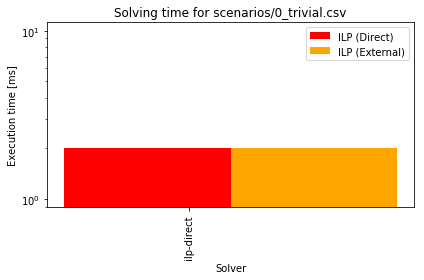

In [41]:
create_single('scenarios/0_trivial.csv')

In [88]:
def get_id(filename):
    return int(os.path.basename(filename).split('_')[0])

In [91]:
# merge csv files into one
def merge(*filenames):
    result = pd.DataFrame(columns=['id', 'solver', 'gen', 'solve', 'valid', 'timeout'])
    for filename in filenames:
        print(filename)
        # load the dateset of one scenario
        df = load(filename)
        if df.empty:
            continue
        # group by solver name, calculate mean for generation and solving time
        # use reset_index to get "normal" dataframe back
        df = df[['name', 'Gen', 'Solved', 'Valid', 'TimeOut']].groupby('name').mean().reset_index()
        # rename columns
        df = df.rename(index=str, columns={"name": "solver", "Gen": "gen",
                                           "Solved": "solve", 'Valid': 'valid', 'TimeOut': 'timeout'})
        # add id column with constant value equal to id of scenario
        df['id'] = get_id(filename)
        # append to result
        result = result.append(df)
    return result        

In [93]:
merged = merge(*sorted(glob.glob('scenarios/*.csv'), key=get_id))
merged

scenarios/0_trivial.csv
scenarios/1_small.csv
scenarios/2_small-many-hw.csv
scenarios/3_small-complex-sw.csv
scenarios/4_medium.csv
scenarios/5_medium-many-hw.csv
scenarios/6_medium-complex-sw.csv
scenarios/7_large.csv
scenarios/8_large-many-hw.csv
scenarios/9_large-complex-sw.csv
scenarios/10_huge.csv


gen id          solve        solver   timeout     valid
0       5.500000  0       0.666667    ilp-direct     False      True
1       0.000000  0       8.666667  ilp-external     False      True
0       6.833333  1       0.000000    ilp-direct     False      True
1       1.666667  1       8.833333  ilp-external     False      True
0       7.666667  2       0.000000    ilp-direct     False      True
1       3.500000  2      18.000000  ilp-external     False      True
0     134.000000  3       5.666667    ilp-direct     False      True
1      59.833333  3     192.500000  ilp-external     False      True
0    1583.166667  4  778017.333333    ilp-direct  0.833333         1
1     723.333333  4  801541.000000  ilp-external         1         1
0    5442.166667  5  797046.333333    ilp-direct      True      True
1      -1.000000  5      -1.000000  ilp-external      True     False
0   36913.500000  6  789360.333333    ilp-direct      True     False
1      -1.000000  6      -1.000000  ilp-external      True     False
0    8528.666667  7  795679.500000    ilp-direct         1  0.166667
1      -1.000000  7      -1.000000  ilp-external         1         0
0   30775.166667  8  787172.166667    ilp-direct      True     False
1      -1.000000  8      -1.000000  ilp-external      True     False
0  300019.000000  9       0.000000    ilp-direct     False     False
1  300649.000000  9       0.000000  ilp-external     False     False